#Linear regression with two input variables
* Find the `pima-diabetes.csv` file in the `./data/` folder.
* Can we predict `Age` knowing `BloodPressure` and `BMI`?

I will attempt to predict someones age based on their education level and how many hours the work per week


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving adult1.csv to adult1 (1).csv


In [ ]:
import pandas as pd
data = pd.read_csv('adult1.csv', delimiter=',')
data.head()

,age,workclass,fnlwgt,education,educationNum,maritalStatus,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,country,earnings
0,39,3,77516,13,13,0,0,1,1,2174,0,40,1,0
1,50,2,83311,13,13,1,1,1,1,0,0,13,1,0
2,38,1,215646,10,9,2,0,1,1,0,0,40,1,0
3,53,1,234721,6,7,1,1,2,1,0,0,40,1,0
4,28,1,338409,13,13,1,2,2,0,0,0,40,14,0


In [ ]:
import numpy as np
# Use np.loadtxt() instead when there are non-numeric values as well
dataset = np.genfromtxt('adult1.csv', delimiter=",", skip_header = True, usecols=(0, 3, 11)) 

In [ ]:
print('')
print(dataset.shape)
print('')
print(dataset[0:5])


(32561, 3)

[[39. 13. 40.]
 [50. 13. 13.]
 [38. 10. 40.]
 [53.  6. 40.]
 [28. 13. 40.]]


In [ ]:
import plotly.express as px
import pandas as pd

d = {'education': dataset[:, 0], 'hoursPerWeek': dataset[:, 1], 'age': dataset[:, 2]}
df = pd.DataFrame(data=d)

fig = px.scatter_3d(df,
              x='education', 
              y='hoursPerWeek',
              z='age', 
              opacity = 0.4)
fig.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(1, input_dim = 2, activation='linear'))

In [ ]:
model.compile(loss='mse', optimizer = 'rmsprop', metrics=['mse'])
model.fit(dataset[:, 0:2], dataset[:, 2], epochs = 256, verbose = 1)

Epoch 1/256
1018/1018 [==============================] - 1s 765us/step - loss: 154.6680 - mse: 154.6680
Epoch 2/256
1018/1018 [==============================] - 1s 804us/step - loss: 154.4725 - mse: 154.4725
Epoch 3/256
1018/1018 [==============================] - 1s 785us/step - loss: 154.3175 - mse: 154.3175
Epoch 4/256
1018/1018 [==============================] - 1s 765us/step - loss: 154.1330 - mse: 154.1330
Epoch 5/256
1018/1018 [==============================] - 1s 761us/step - loss: 153.9591 - mse: 153.9591
Epoch 6/256
1018/1018 [==============================] - 1s 761us/step - loss: 153.7561 - mse: 153.7561
Epoch 7/256
1018/1018 [==============================] - 1s 760us/step - loss: 153.6386 - mse: 153.6386
Epoch 8/256
1018/1018 [==============================] - 1s 780us/step - loss: 153.4963 - mse: 153.4963
Epoch 9/256
1018/1018 [==============================] - 1s 770us/step - loss: 153.3447 - mse: 153.3447
Epoch 10/256
1018/1018 [==============================] - 1s 790

In [ ]:
print('Model weights (w0, w1, and bias):')
w0 = model.layers[0].get_weights()[0][0]
w1 = model.layers[0].get_weights()[0][1]
b0 = model.layers[0].get_weights()[1]
print(w0)
print(w1)
print(b0)

Model weights (w0, w1, and bias):
[0.07203912]
[0.60686725]
[31.882277]


What is our model's equation?

In [ ]:
np.set_printoptions(precision = 2)
print ('True Validation Data:')
print(dataset[:10, 2])
prediction = model.predict(dataset[:, 0:2])
print ('Prediction:')
print(prediction[0:5].T)

True Validation Data:
[40. 13. 40. 40. 40. 40. 16. 45. 50. 40.]
Prediction:
[[42.58 43.37 40.69 39.34 41.79]]


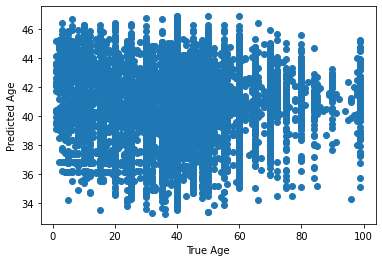

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(dataset[:, 2], prediction)
plt.ylabel('Predicted Age')
plt.xlabel('True Age')
plt.show()